# Classification Algorithms in a Notebook

This notebook is dedicated to the exercises of week 3 in the Machine Learning Challenge organised by ING: https://radu-enuca.gitbook.io/ml-challenge/

During this exercise, we are going to explore the **Iris plants** dataset that comes with scikit-learn. We use this dataset to explore different **classification algorithms** that fall under the umberella of supervised learning. Again, I hope you'll enjoy it as much as I did:)

Our analysis will be organized as follows:
1. Preliminary data analysis
2. K Nearest Neighbour
3. Support Vector Classification
4. Gaussian Naive Bayes


In [1]:
# Load dependencies:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

## 1. Preliminary data analysis

First, we are going to load the toy dataset from sklearn and provide some summary statistics to get a better feeling of the data

In [2]:
iris = datasets.load_iris()
type(iris)
# Dataset is of type Bunch, as we learned in this week's exercises

print(iris.keys())
print(iris.DESCR)
print('The three classes of the Iris plant are: ', iris.target_names)
print(iris.data.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1

In [3]:
# To leverage on the pandas functionality we transform the data to DataFrames
df_X = pd.DataFrame(iris.data, columns=iris.feature_names)
df_y = pd.DataFrame(iris.target, columns=['Class'])

# some summary statistics:
df_y.info()
df_y.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Class   150 non-null    int32
dtypes: int32(1)
memory usage: 728.0 bytes


,Class
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [4]:
# And now some summary statistics of the features
df_X.head()
df_X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


It might be interesting to view the distribution of these features per Iris class (Setosa, Versicolor and Virginica). Let's do that!

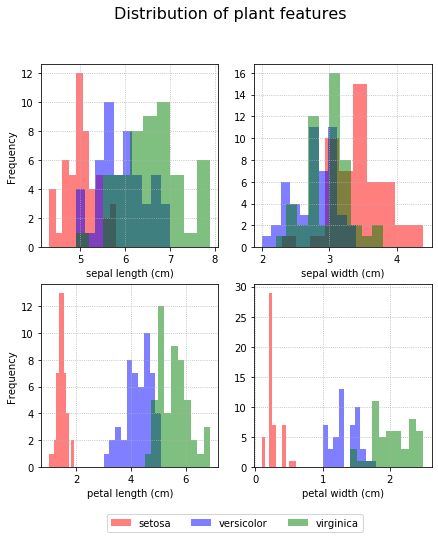

In [12]:
fig1, ax1 = plt.subplots(nrows=2, ncols=2, constrained_layout=False, figsize=(7, 8))
fig1.suptitle('Distribution of plant features', fontsize=16)
for i, feature in enumerate(df_X.columns):
    r, c = int(i/2), i % 2
    ax1[r, c].hist(df_X.loc[df_y['Class'] == 0, feature], bins=10, color='red', alpha=0.5)
    ax1[r, c].hist(df_X.loc[df_y['Class'] == 1, feature], bins=10, color='blue', alpha=0.5)
    ax1[r, c].hist(df_X.loc[df_y['Class'] == 2, feature], bins=10, color='green', alpha=0.5)
    ax1[r, c].grid(axis='both', linestyle='dotted')
    ax1[r, c].set_xlabel(feature)
    # ax1[r, c].set_title(feature)
    if c == 0:
        ax1[r, c].set_ylabel('Frequency')
fig1.legend(iris.target_names, bbox_to_anchor=(0.73, 0.08), ncol=3)
fig1.subplots_adjust(bottom=0.18)

I love the colors! What if we could isolate the two different items of the plant (sepal and petal) and create a scatter plot of the different Iris types?

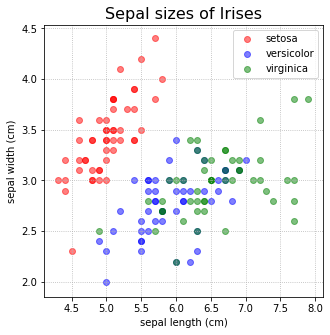

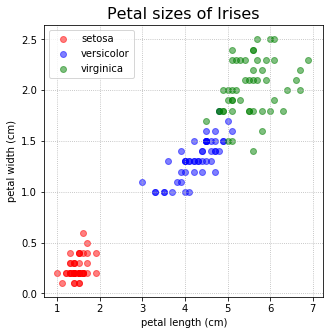

In [13]:
# Sepal sizes
plt.figure(figsize=(5, 5))
plt.scatter(df_X.loc[df_y['Class'] == 0, 'sepal length (cm)'], df_X.loc[df_y['Class'] == 0, 'sepal width (cm)'],
            color='red', alpha=0.5)
plt.scatter(df_X.loc[df_y['Class'] == 1, 'sepal length (cm)'], df_X.loc[df_y['Class'] == 1, 'sepal width (cm)'],
            color='blue', alpha=0.5)
plt.scatter(df_X.loc[df_y['Class'] == 2, 'sepal length (cm)'], df_X.loc[df_y['Class'] == 2, 'sepal width (cm)'],
            color='green', alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Sepal sizes of Irises', fontsize=16)
plt.legend(iris.target_names, ncol=1)
plt.grid(axis='both', linestyle='dotted')

# Petal sizes
plt.figure(figsize=(5, 5))
plt.scatter(df_X.loc[df_y['Class'] == 0, 'petal length (cm)'], df_X.loc[df_y['Class'] == 0, 'petal width (cm)'],
            color='red', alpha=0.5)
plt.scatter(df_X.loc[df_y['Class'] == 1, 'petal length (cm)'], df_X.loc[df_y['Class'] == 1, 'petal width (cm)'],
            color='blue', alpha=0.5)
plt.scatter(df_X.loc[df_y['Class'] == 2, 'petal length (cm)'], df_X.loc[df_y['Class'] == 2, 'petal width (cm)'],
            color='green', alpha=0.5)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal sizes of Irises', fontsize=16)
plt.legend(iris.target_names)
plt.grid(axis='both', linestyle='dotted')

## 2. K-Nearest Neighbour

We already explored this algorithm during the lesson, but it is useful to practice on a new dataset! Let's start by deviding our data in a train and a test set and fit our model.

In [15]:
# split our sample
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.50, random_state=10)

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train.values.ravel())
y_pred_knn = knn.predict(X_test)

# Print the accuracy based on our test set
print('Accuracy: ', knn.score(X_test, y_test))

Accuracy:  0.9466666666666667


Similar to the lessons we are going to look for the best amount of neighbours, looping from 1 until 40

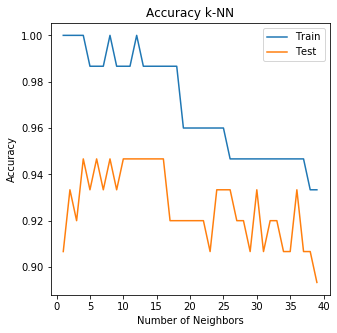

In [17]:
neighbors = np.arange(1, 40)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    knn_loop = KNeighborsClassifier(n_neighbors=k)
    knn_loop.fit(X_train, y_train.values.ravel())
    train_acc[i] = knn_loop.score(X_train, y_train)
    test_acc[i] = knn_loop.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(5, 5))
plt.title('Accuracy k-NN')
plt.plot(neighbors, train_acc, label='Train')
plt.plot(neighbors, test_acc, label='Test')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

This suggests that around k=12 neighbours would give us the best performance

## 3. Supporting Vector Classification (SVC)

For our following models we are only going to investigate the classification of the Iris type based on Petal length

In [18]:
X_train_petal = X_train.iloc[:, 2:4].copy()
X_test_petal = X_test.iloc[:, 2:4].copy()

We are going to explore two Supporting Vector Classivication models with diffferent kernels
For this exercise we will set the regularization parameter at C=1 for both models

In [19]:
C = 1.0
svc_lin = svm.SVC(kernel='linear', C=C).fit(X_train_petal, y_train.values.ravel())
y_pred_svc_lin = svc_lin.predict(X_test_petal)
print('Accuracy with linear kernel: ', svc_lin.score(X_test_petal, y_test))

svc_rbf = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train_petal, y_train.values.ravel())
y_pred_svc_rbf = svc_rbf.predict(X_test_petal)
print('Accuracy with rbf kernel: ', svc_rbf.score(X_test_petal, y_test))

svc_poly = svm.SVC(kernel='poly', degree=5, C=C).fit(X_train_petal, y_train.values.ravel())
y_pred_svc_poly = svc_poly.predict(X_test_petal)
print('Accuracy with poly kernel: ', svc_poly.score(X_test_petal, y_test))

Accuracy with linear kernel:  0.9333333333333333
Accuracy with rbf kernel:  0.9333333333333333
Accuracy with poly kernel:  0.9333333333333333


## 4. Gaussian Naive bayes

Accuracy:  0.9733333333333334


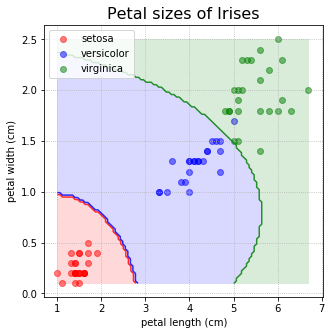

In [20]:
gnb = GaussianNB()
gnb.fit(X_train_petal, y_train.values.ravel())
print('Accuracy: ', gnb.score(X_test_petal, y_test))

points = 100
ls_X = np.linspace(min(X_train_petal.iloc[:, 0]), max(X_train_petal.iloc[:, 0]), points)
ls_Y = np.linspace(min(X_train_petal.iloc[:, 1]), max(X_train_petal.iloc[:, 1]), points)
X_grid, Y_grid = np.meshgrid(ls_X, ls_Y)

ls_Z = np.array([gnb.predict([[x_coord, y_coord]])[0] for x_coord, y_coord in zip(np.ravel(X_grid), np.ravel(Y_grid))])
Z_grid = ls_Z.reshape(X_grid.shape)

# Recreate the scatter plot from our preliminary analysis, but now with the resulting regions
plt.figure(figsize=(5, 5))
plt.scatter(X_train_petal.loc[df_y['Class'] == 0, 'petal length (cm)'], X_train_petal.loc[df_y['Class'] == 0, 'petal width (cm)'],
            color='red', alpha=0.5)
plt.scatter(X_train_petal.loc[df_y['Class'] == 1, 'petal length (cm)'], X_train_petal.loc[df_y['Class'] == 1, 'petal width (cm)'],
            color='blue', alpha=0.5)
plt.scatter(X_train_petal.loc[df_y['Class'] == 2, 'petal length (cm)'], X_train_petal.loc[df_y['Class'] == 2, 'petal width (cm)'],
            color='green', alpha=0.5)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Petal sizes of Irises', fontsize=16)
plt.legend(iris.target_names)
plt.grid(axis='both', linestyle='dotted')
plt.contourf(X_grid, Y_grid, Z_grid, 2, alpha=0.15, colors=('red', 'blue', 'green'))
plt.contour(X_grid, Y_grid, Z_grid, 2, alpha=0.8, colors=('red', 'blue', 'green'))

Look at that! This figure is almost as colorful as the Iris plants themselves. And with that, I'll call it a day. Have a nice weekend.